In [25]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.metrics import ConfusionMatrixDisplay

## Preprocessing the images

In [26]:
data_dir = "./data"

In [27]:
image_size = (250, 250)
batch_size = 32

data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)

Found 338 files belonging to 5 classes.


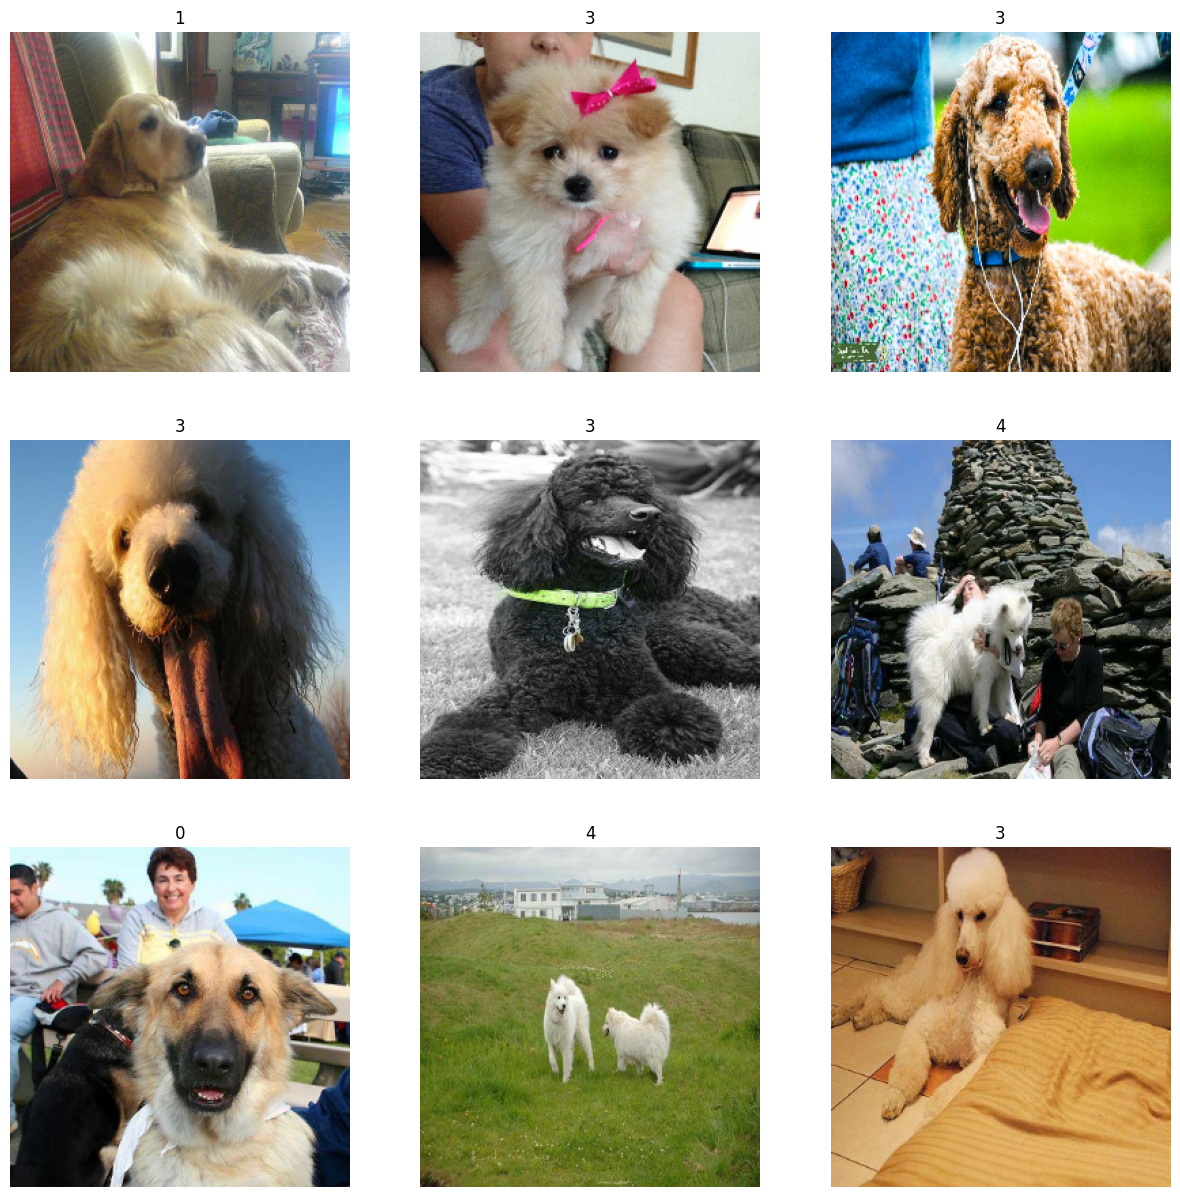

In [28]:
plt.figure(figsize=(15, 15))
for images, labels in data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        y_train = int(labels[i])
        plt.title(int(labels[i]))
        plt.axis("off")

In [29]:
## Sets affine transformations to be apllied to an image
data_gen = ImageDataGenerator(rescale = 1./255 ,
                              width_shift_range = 0.2 ,
                              validation_split=0.1,
                              height_shift_range = 0.2 ,
                              shear_range = 0.2 ,
                              horizontal_flip = True ,
                              vertical_flip = True,
                              zoom_range = 0.2)
## Apllies the set transformations to all images in a directory and separates a train sample
training_data = data_gen.flow_from_directory(data_dir,
                                            target_size = (250,250),
                                            class_mode='categorical',
                                            subset = 'training')

## Apllies the set transformations to all images in a directory and separates a validation sample                                            )
validation_data = data_gen.flow_from_directory(data_dir,
                                              target_size = (250,250),
                                              class_mode='categorical',
                                              subset = 'validation')

Found 306 images belonging to 5 classes.
Found 32 images belonging to 5 classes.


## Define and train model

In [31]:
def dog_breed_classifier():

    '''
    Creates a model for classifing dog breeds in five classes. Base model is InceptionV3 without top and
    trained with imagenet weights.

    Parameters:

    Returns:
            model (str): Compiled model
    '''

    tf.random.set_seed(42) 
    base_model_V3 = InceptionV3(weights="imagenet",include_top=False, input_shape=(250, 250, 3))
    avg = tf.keras.layers.GlobalAveragePooling2D()(base_model_V3.output)
    dense_1 = tf.keras.layers.Dense(612, activation="relu")(avg)
    dropout_1 = tf.keras.layers.Dropout(0.3)(dense_1)
    # dense_2 = tf.keras.layers.Dense(64, activation="relu")(dropout_1)
    # dropout_2 = tf.keras.layers.Dropout(0.2)(dense_2)
    output = tf.keras.layers.Dense(5, activation="softmax")(dropout_1)
    model_v3 = tf.keras.Model(inputs=base_model_V3.input, outputs=output)
    

    ## Freeze the backbone of the model
    for layer in base_model_V3.layers:
        layer.trainable = False
    
    optimizer = tf.keras.optimizers.Adam()
    model_v3.compile(loss="categorical_crossentropy", optimizer=optimizer,
                metrics=["accuracy"])
    
    return model_v3

In [32]:
model = dog_breed_classifier()

## save best model's weights
checkpoint_path = "weights_5_class.ckpt"
# earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='min')
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_best_only=True)

In [33]:
history = model.fit(training_data, epochs=30,
                    validation_data=validation_data,
                    callbacks=[cp_callback])

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 2.0174 - accuracy: 0.5392

INFO:tensorflow:Assets written to: weights_5_class.ckpt\assets


INFO:tensorflow:Assets written to: weights_5_class.ckpt\assets


10/10 [==============================] - 113s 11s/step - loss: 2.0174 - accuracy: 0.5392 - val_loss: 0.7730 - val_accuracy: 0.7188
Epoch 2/30
10/10 [==============================] - 124s 12s/step - loss: 0.5301 - accuracy: 0.8007 - val_loss: 0.8296 - val_accuracy: 0.7812
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.4332 - accuracy: 0.8562 

INFO:tensorflow:Assets written to: weights_5_class.ckpt\assets


INFO:tensorflow:Assets written to: weights_5_class.ckpt\assets


10/10 [==============================] - 173s 18s/step - loss: 0.4332 - accuracy: 0.8562 - val_loss: 0.5771 - val_accuracy: 0.8125
Epoch 4/30
10/10 [==============================] - 146s 15s/step - loss: 0.2956 - accuracy: 0.8987 - val_loss: 0.8972 - val_accuracy: 0.7812
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 0.2686 - accuracy: 0.9020 

INFO:tensorflow:Assets written to: weights_5_class.ckpt\assets


INFO:tensorflow:Assets written to: weights_5_class.ckpt\assets


10/10 [==============================] - 197s 20s/step - loss: 0.2686 - accuracy: 0.9020 - val_loss: 0.5358 - val_accuracy: 0.8125
Epoch 6/30
10/10 [==============================] - 148s 15s/step - loss: 0.3227 - accuracy: 0.8889 - val_loss: 0.6317 - val_accuracy: 0.8750
Epoch 7/30
10/10 [==============================] - ETA: 0s - loss: 0.1679 - accuracy: 0.9477 

INFO:tensorflow:Assets written to: weights_5_class.ckpt\assets


INFO:tensorflow:Assets written to: weights_5_class.ckpt\assets


10/10 [==============================] - 203s 21s/step - loss: 0.1679 - accuracy: 0.9477 - val_loss: 0.5303 - val_accuracy: 0.8438
Epoch 8/30
10/10 [==============================] - 138s 14s/step - loss: 0.2269 - accuracy: 0.9248 - val_loss: 0.8788 - val_accuracy: 0.7812
Epoch 9/30
10/10 [==============================] - 136s 14s/step - loss: 0.2226 - accuracy: 0.9085 - val_loss: 0.6991 - val_accuracy: 0.8750
Epoch 10/30
10/10 [==============================] - ETA: 0s - loss: 0.1954 - accuracy: 0.9314 

INFO:tensorflow:Assets written to: weights_5_class.ckpt\assets


INFO:tensorflow:Assets written to: weights_5_class.ckpt\assets


10/10 [==============================] - 204s 21s/step - loss: 0.1954 - accuracy: 0.9314 - val_loss: 0.4625 - val_accuracy: 0.9062
Epoch 11/30
10/10 [==============================] - 234s 23s/step - loss: 0.1657 - accuracy: 0.9379 - val_loss: 0.7426 - val_accuracy: 0.8438
Epoch 12/30
10/10 [==============================] - 211s 21s/step - loss: 0.1293 - accuracy: 0.9575 - val_loss: 0.7305 - val_accuracy: 0.8125
Epoch 13/30
10/10 [==============================] - 210s 21s/step - loss: 0.1270 - accuracy: 0.9673 - val_loss: 0.5920 - val_accuracy: 0.8125
Epoch 14/30
10/10 [==============================] - 215s 22s/step - loss: 0.1017 - accuracy: 0.9706 - val_loss: 0.7730 - val_accuracy: 0.7812
Epoch 15/30
10/10 [==============================] - 208s 21s/step - loss: 0.1501 - accuracy: 0.9281 - val_loss: 0.8239 - val_accuracy: 0.7188
Epoch 16/30
10/10 [==============================] - 208s 21s/step - loss: 0.1404 - accuracy: 0.9575 - val_loss: 0.8608 - val_accuracy: 0.7500
Epoch 17/30

## Validation Confusion Matrix

1/1 [==============================] - 6s 6s/step


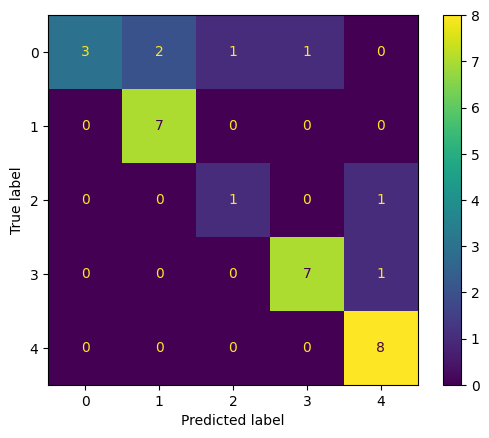

In [34]:
images, labels = next(validation_data)
modelo = tf.keras.models.load_model(checkpoint_path)
y_pred = modelo.predict(images)
ConfusionMatrixDisplay.from_predictions(np.argmax(labels,1), np.argmax(y_pred,1))
plt.show()

Model confuses the classes "german shepherd" and "other"

## Test the model

In [10]:
def test_model(img_path, model,checkpoint_path):

        '''
        Predicts the breed of dog from the input image

        Parameters:
                        img_path (string): Path to an image
                        model (functional): pretrained Keras model
                        checkpoint_path (string): Path to the file with the waights to be used.

        Returns:
                prediction (str): Dog breed corresponding to the input image
        '''
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(250, 250))

        # Preprocess the image
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0  

        model.load_weights(checkpoint_path)
        Y_proba = model.predict(img_array)
        top_K = np.argsort(Y_proba, axis=-1)[:, -1:]  
        
        ## Create list with classes' names
        classes = [breed for breed in os.listdir(data_dir)] + ["other"]

        print(f"  Class {classes[top_K[0][0]]} - Probability: {Y_proba[0][top_K[0][0]]:.2%}")
        
        ## warns if choice seemed almost random
        if Y_proba[0][top_K[0][0]] < 0.5:
                print("Warning: dog's breed might not be in the database")

        return top_K[0][0]

In [11]:
img_path = "227549891f9f24e53350cd805b82d7ce.jpg"

prediction = test_model(img_path, model,checkpoint_path)

ValueError: Received incompatible tensor with shape (128,) when attempting to restore variable with shape (1024,) and name dense/bias:0.